# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
# gdown - Google Drive Public File/Folder Downloader
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 84.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 82.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 36.1MB/s]


In [4]:
data = pd.read_csv('./train.csv')

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
# Посмотрим на данные
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
# TotalSpent должен быть числовым признаком. Непорядок
# А ещё там есть пропуски вот такие: ' '
(data['TotalSpent'] == ' ').sum()

9

In [9]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.nan)
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [10]:
# Ещё раз смотрим на то, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [11]:
# Убираем пропуски
data.dropna(inplace=True)

In [12]:
# Смотрим на числовые признаки
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461,0.159681,0.262469
std,24.534723,30.177911,2269.014233,0.366345,0.440018
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.500000,401.100000,0.000000,0.000000
50%,29.000000,70.450000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [13]:
# Смотрим на бинарные и категоримальные признаки
data.describe(include=['object']).T

,count,unique,top,freq
Sex,5273,2,Male,2651
HasPartner,5273,2,No,2704
HasChild,5273,2,No,3676
HasPhoneService,5273,2,Yes,4754
HasMultiplePhoneNumbers,5273,3,No,2508
HasInternetService,5273,3,Fiber optic,2341
HasOnlineSecurityService,5273,3,No,2611
HasOnlineBackup,5273,3,No,2331
HasDeviceProtection,5273,3,No,2316
HasTechSupportAccess,5273,3,No,2603


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

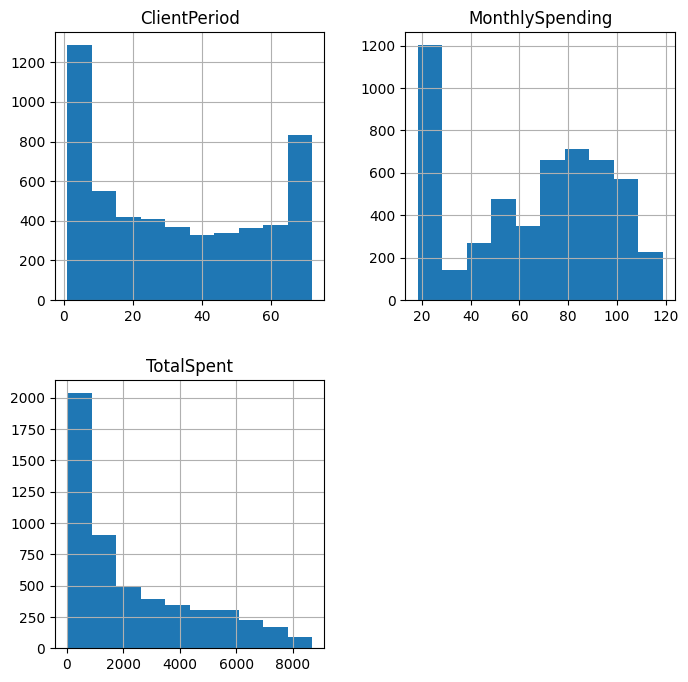

In [14]:
# гистограмма для числовых призхнаков
data[num_cols].hist(figsize=(8, 8))

,ClientPeriod,MonthlySpending,TotalSpent
ClientPeriod,1.000000,0.248583,0.826332
MonthlySpending,0.248583,1.000000,0.652034
TotalSpent,0.826332,0.652034,1.000000


array([[<Axes: xlabel='ClientPeriod', ylabel='ClientPeriod'>,
        <Axes: xlabel='MonthlySpending', ylabel='ClientPeriod'>,
        <Axes: xlabel='TotalSpent', ylabel='ClientPeriod'>],
       [<Axes: xlabel='ClientPeriod', ylabel='MonthlySpending'>,
        <Axes: xlabel='MonthlySpending', ylabel='MonthlySpending'>,
        <Axes: xlabel='TotalSpent', ylabel='MonthlySpending'>],
       [<Axes: xlabel='ClientPeriod', ylabel='TotalSpent'>,
        <Axes: xlabel='MonthlySpending', ylabel='TotalSpent'>,
        <Axes: xlabel='TotalSpent', ylabel='TotalSpent'>]], dtype=object)

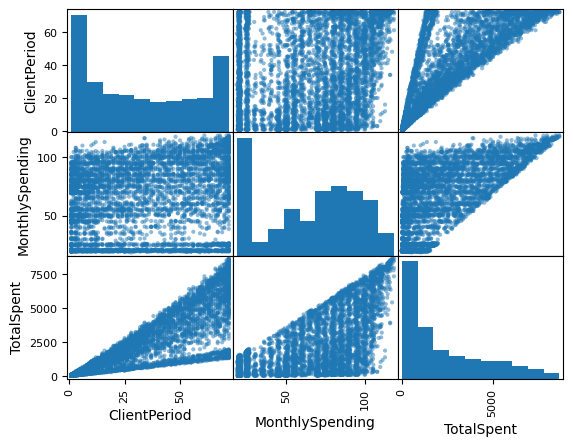

In [15]:
# посмотрим на связь чисолвых призаков
display(data[num_cols].corr())

pd.plotting.scatter_matrix(data[num_cols])

# нужно будет убрать TotalSpent или ClientPeriod, т.к. между ними сиьлная линейная связь
# лучше убрать TotalSpent, потому что из-за пропусков в нём мы лишаеммя 9 строк данных и это можно сделать ещё в самом начале

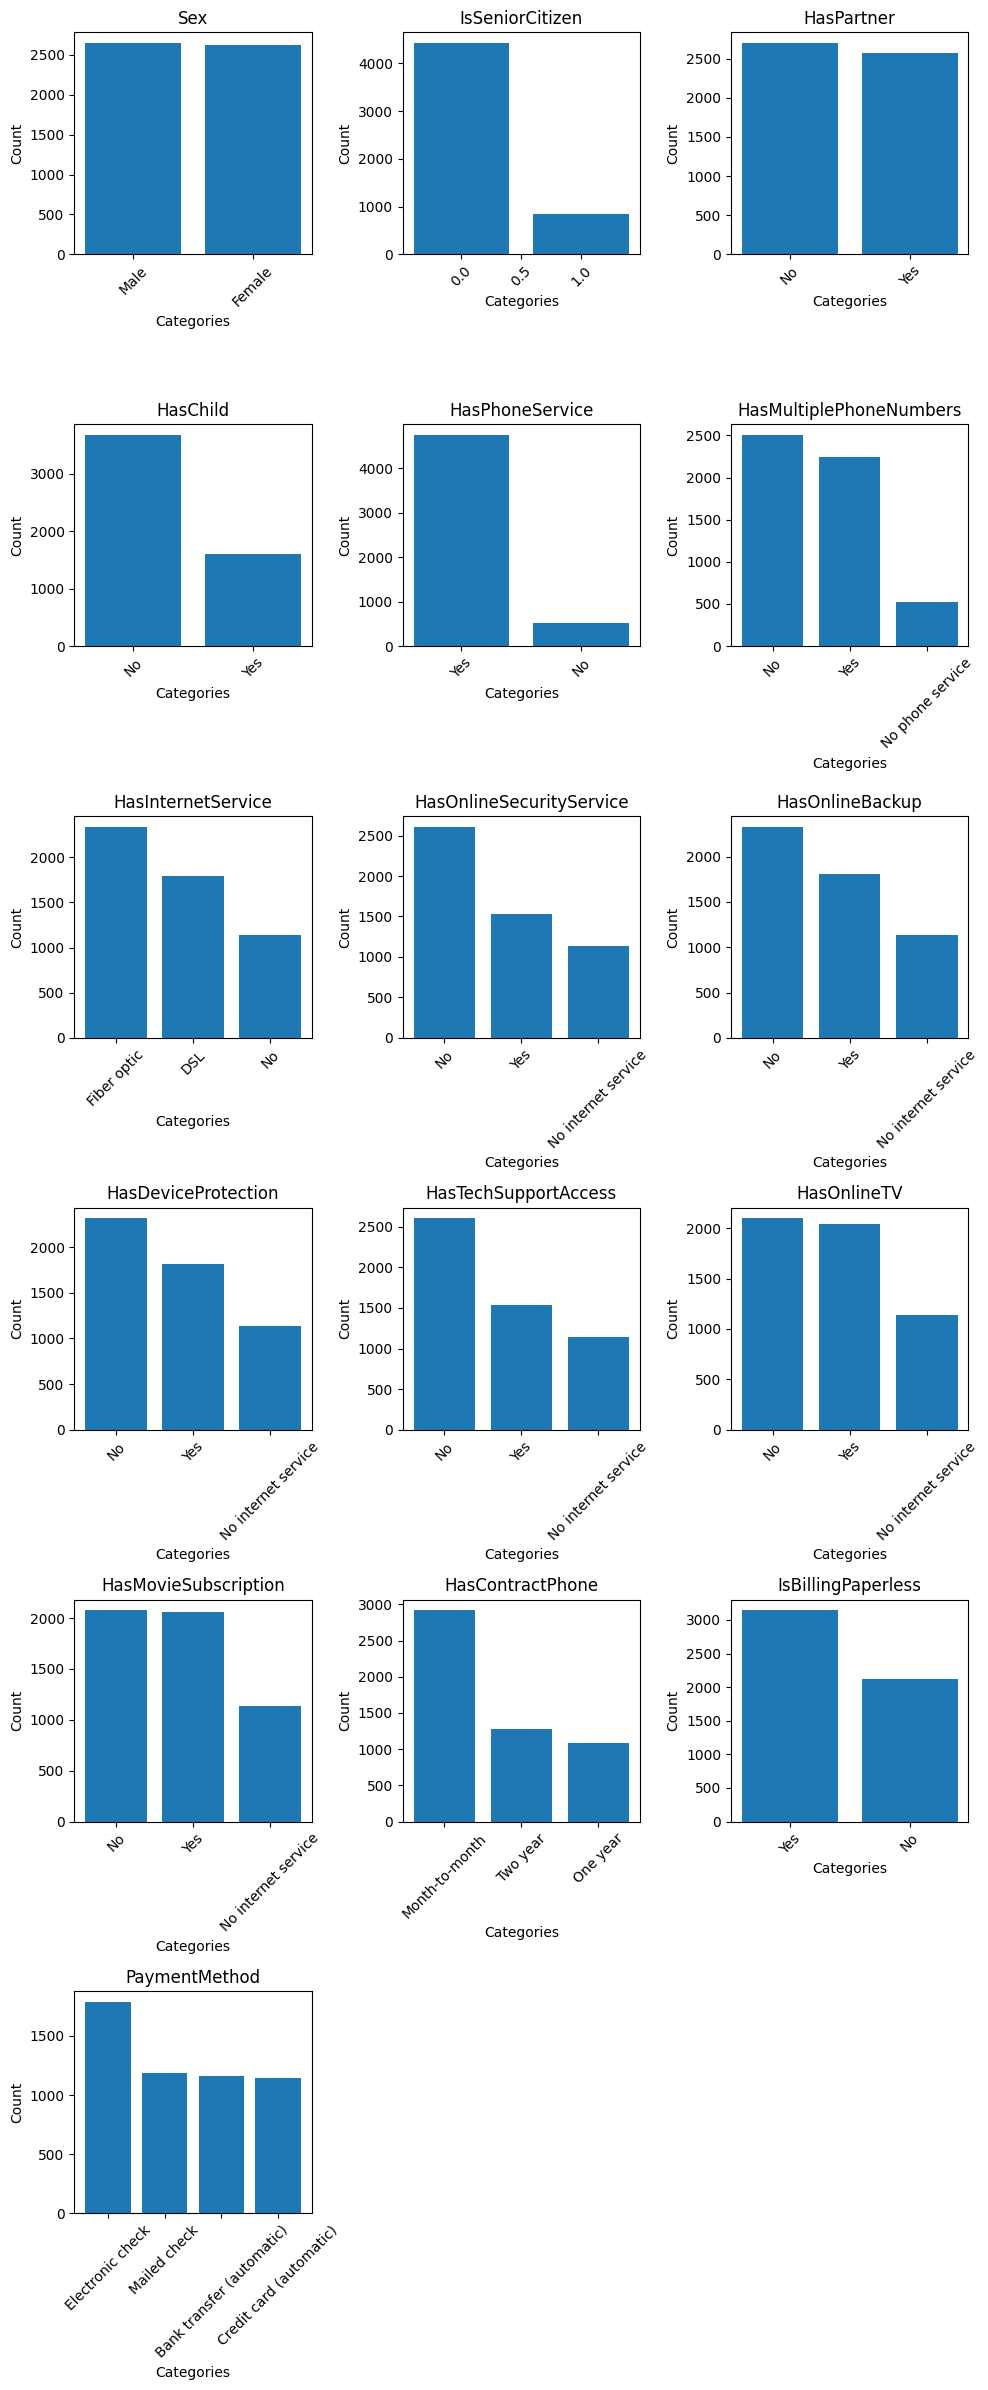

In [16]:
# столбиковые диаграммы для категориальных признаков
from math import ceil
# Расчёт количества строк для таблицы с графиками
n_cols = 3  # количество столбцов для таблицы с графиками
n_rows = ceil(len(cat_cols) / n_cols)

# Создаём figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 4*n_rows))

for i, col in enumerate(cat_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]
    value_counts = data[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(col)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Убираем неиспользованные места для графиков
for i in range(len(cat_cols), n_rows * n_cols):
    row_idx = i // n_cols
    col_idx = i % n_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

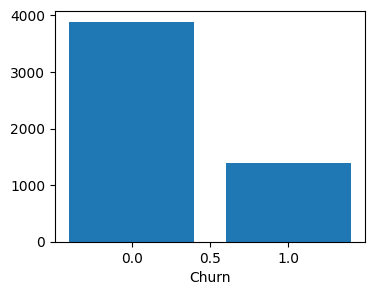

In [17]:
 # Распределение целевой переменной
value_counts = data['Churn'].value_counts()
plt.figure(figsize=(4, 3))
plt.xlabel('Churn')
plt.bar(value_counts.index, value_counts.values)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [18]:
# YOUR CODE
# см. обработку Nan в TotalSpent

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline

In [20]:
# Создание бинарных признаков из категориальных
dummy_features = pd.get_dummies(data[cat_cols], drop_first=True)

# Series с целевой переменной
y = data['Churn']

# Создание нового dataframe с преобразованными признаками
X = pd.concat([data[num_cols], dummy_features], axis=1)

# Вспоминаем, что хотели убрать TotalSpent
X.drop(columns=['TotalSpent'], inplace=True)

X.head()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,0,1,1,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
1,72,25.85,0,1,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
2,1,75.90,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,32,79.30,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,0,0,1,1,1,0,1,1,...,0,1,0,1,0,1,0,1,0,0


In [21]:
# Смотрим, что получилось
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5273 non-null   int64  
 1   MonthlySpending                               5273 non-null   float64
 2   IsSeniorCitizen                               5273 non-null   int64  
 3   Sex_Male                                      5273 non-null   uint8  
 4   HasPartner_Yes                                5273 non-null   uint8  
 5   HasChild_Yes                                  5273 non-null   uint8  
 6   HasPhoneService_Yes                           5273 non-null   uint8  
 7   HasMultiplePhoneNumbers_No phone service      5273 non-null   uint8  
 8   HasMultiplePhoneNumbers_Yes                   5273 non-null   uint8  
 9   HasInternetService_Fiber optic                5273 non-null   u

In [37]:
# Разбиваем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Нормируем признаки (для бинарных это необязательно - они уже в диапазоне 0-1).
# Просто не хочется сейчас заниматься числовыми призаками отдельно
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Занимаемся перебором гиперпаметров
log_reg = LogisticRegression()
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Лучшее значение ROC-AUC
display(grid_search.best_score_)

# Параметры лучшего классификатора
display(grid_search.best_params_)
display(grid_search.best_estimator_)

0.8422936336210842

{'C': 100}

LogisticRegression(C=100)

In [34]:
# Значение ROC-AUC на тестовой выборке для лучшего классификатора
roc_auc_score_test = roc_auc_score(
    y_test,
    grid_search.best_estimator_.predict(X_test_scaled))
roc_auc_score_test

0.7176220806794055

Выпишите какое лучшее качество и с какими параметрами вам удалось получить


*   на обучающей выборке: `roc_auc_score=0.84`
*   на тестовой выборке: `roc_auc_score=0.72`



## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [25]:
# YOUR CODE
!pip install catboost
import catboost
# документация: https://catboost.ai/docs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00


In [ ]:
# Опять разбиваем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(data[num_cols + cat_cols],
                                                    data['Churn'],
                                                    train_size=0.8,
                                                    random_state=42)

model = catboost.CatBoostClassifier(loss_function='Logloss',
                                    cat_features=cat_cols,
                                    eval_metric='AUC')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid,
                                       X=X_train,
                                       y=y_train,
                                       plot=True)

In [46]:
grid_search_result['params']

{'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 7}

In [59]:
best_catboost = catboost.CatBoostClassifier(
    loss_function='Logloss',
    cat_features=cat_cols,
    eval_metric='AUC',
    **{'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 7}
)

best_catboost.fit(X=X_train, y=y_train,)

 # Значение ROC-AUC на обучающей выборке для лучшего классификатора
roc_auc_catboost_train = roc_auc_score(
    y_train,
    best_catboost.predict(X_train))
print(roc_auc_catboost_train)

 # Значение ROC-AUC на тестовой выборке для лучшего классификатора
roc_auc_catboost_test = roc_auc_score(
    y_test,
    best_catboost.predict(X_test))
print(roc_auc_catboost_test)

0:	total: 22.5ms	remaining: 22.5s
1:	total: 49.5ms	remaining: 24.7s
2:	total: 88.3ms	remaining: 29.3s
3:	total: 114ms	remaining: 28.4s
4:	total: 130ms	remaining: 25.8s
5:	total: 177ms	remaining: 29.3s
6:	total: 209ms	remaining: 29.6s
7:	total: 232ms	remaining: 28.7s
8:	total: 260ms	remaining: 28.7s
9:	total: 301ms	remaining: 29.8s
10:	total: 324ms	remaining: 29.1s
11:	total: 353ms	remaining: 29.1s
12:	total: 389ms	remaining: 29.5s
13:	total: 432ms	remaining: 30.4s
14:	total: 450ms	remaining: 29.5s
15:	total: 459ms	remaining: 28.2s
16:	total: 476ms	remaining: 27.6s
17:	total: 497ms	remaining: 27.1s
18:	total: 516ms	remaining: 26.6s
19:	total: 526ms	remaining: 25.8s
20:	total: 545ms	remaining: 25.4s
21:	total: 567ms	remaining: 25.2s
22:	total: 586ms	remaining: 24.9s
23:	total: 605ms	remaining: 24.6s
24:	total: 626ms	remaining: 24.4s
25:	total: 646ms	remaining: 24.2s
26:	total: 670ms	remaining: 24.2s
27:	total: 693ms	remaining: 24s
28:	total: 717ms	remaining: 24s
29:	total: 737ms	remainin

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

*ВАШ* ОТВЕТ

* на обучении 0.79
* на тесте 0.71

## Применение AutoML


In [47]:
# В каких-то презентациях по automl сказано (то ли у Сбер, то ли у H20), что эти
# продукты решают задачи сравнимо с топ Data Scientist'ами. Вот и посмотрим)))
# Воспольземся H20 auto ml
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.6 MB/s eta 0:00:00
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpl427tmbb
  JVM stdout: /tmp/tmpl427tmbb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpl427tmbb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_r43c7r
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [48]:
# Загрузка данных в H2O-datarfame
df = h2o.import_file('./train.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [49]:
df.describe()

Rows:5282
Cols:20

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
type,int,real,real,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int
mins,0.0,18.25,18.8,,0.0,,,,,,,,,,,,,,,0.0
mean,32.397008708822426,64.92475388110564,2291.390460838232,,0.15940931465354033,,,,,,,,,,,,,,,0.26202196137826583
maxs,72.0,118.75,8684.8,,1.0,,,,,,,,,,,,,,,1.0
sigma,24.55032614971722,30.176464470507355,2269.014233217681,,0.36609200845673096,,,,,,,,,,,,,,,0.4397761574179577
zeros,9,0,0,,4440,,,,,,,,,,,,,,,3898
missing,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,55.0,19.5,1026.35,Male,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.0
1,72.0,25.85,1872.2,Male,0.0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.0
2,1.0,75.9,75.9,Male,0.0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1.0


In [50]:
# converting the 'Churn' column to enum
df['Churn'] = df['Churn'].asfactor()

In [51]:
# назовём столбцы-факторы и столбец-целевую переменную: x и y
y = 'Churn'
x = df.columns
x.remove(y)

In [52]:
# Запускаем AutoMl, останавливаемся после опробования 10 моделей
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),1/4
# XGBoost base models (used / total),3/3
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [53]:
# топ-10 моделей
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20240318_191956,0.847195,0.411275,0.660979,0.233117,0.36532,0.133459
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_191956,0.845901,0.412677,0.661191,0.234797,0.365961,0.133927
GLM_1_AutoML_1_20240318_191956,0.844679,0.415517,0.650145,0.237601,0.367398,0.134981
GBM_1_AutoML_1_20240318_191956,0.843858,0.414657,0.658225,0.236497,0.366995,0.134686
XGBoost_3_AutoML_1_20240318_191956,0.83567,0.427681,0.64469,0.248259,0.372433,0.138707
XGBoost_1_AutoML_1_20240318_191956,0.835618,0.430001,0.641302,0.243875,0.373461,0.139473
GBM_2_AutoML_1_20240318_191956,0.833867,0.426627,0.642986,0.249227,0.372371,0.13866
GBM_3_AutoML_1_20240318_191956,0.832348,0.428927,0.631275,0.243135,0.373621,0.139593
XRT_1_AutoML_1_20240318_191956,0.8315,0.430663,0.635475,0.246674,0.373719,0.139666
GBM_4_AutoML_1_20240318_191956,0.829987,0.432402,0.633801,0.254964,0.375145,0.140733


In [54]:
# лучшая модель хранится в aml.leader
# расчёт значений на тестовой выборке с помощью объекта лучшей модели
df_test = h2o.import_file('./test.csv')
preds_automl = aml.leader.predict(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [55]:
preds_automl.head()

predict,p0,p1
0,0.951162,0.0488377
1,0.272186,0.727814
1,0.349187,0.650813
0,0.984489,0.0155112
0,0.995138,0.00486241
0,0.883727,0.116273
1,0.611486,0.388514
0,0.703721,0.296279
0,0.94332,0.0566801
1,0.498399,0.501601


In [56]:
# преобразуем H2O-dataframe в pandas dataframe
# так проще будет сохранить в csv результаты предсказаний
preds_automl_pandas = preds_automl.as_data_frame()
preds_automl_pandas.columns = ['Id', '_', 'Churn']
preds_automl_pandas.head()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,Id,_,Churn
0,0,0.951162,0.048838
1,1,0.272186,0.727814
2,1,0.349187,0.650813
3,0,0.984489,0.015511
4,0,0.995138,0.004862


In [61]:
# Предсказания этой модели и были отправлены в Stepik
preds_automl_pandas['Churn'].to_csv('./my_submission.csv')

roc_auc на тесте получился 0.85

    ROC-AUC вашего решения равен 0.85288352777688.
    Это дает вам 5.0 баллов. Если вы хотите больше баллов, можете попробовать еще раз.   

# Предсказания

Лучшее решение отправьте в Stepik.